upload the first image:


Saving 22.jpg to 22 (2).jpg


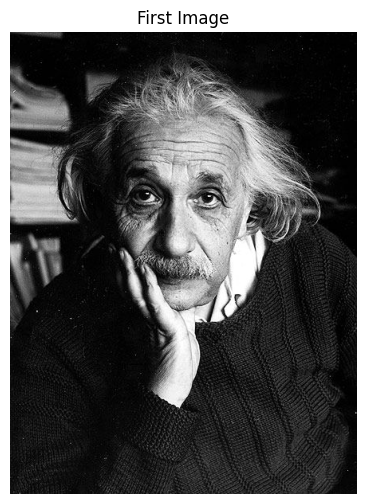

upload the second image:


Saving Untitled.jpg to Untitled (2).jpg


<ipython-input-3-8df56609591e>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(target_size, Image.ANTIALIAS)


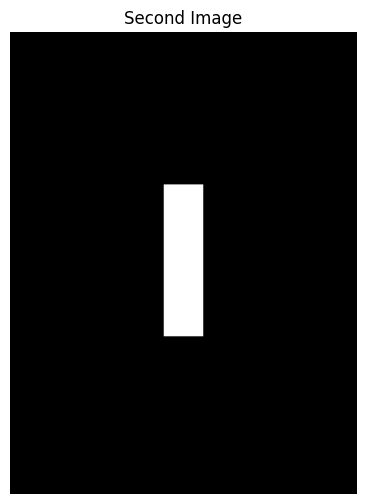

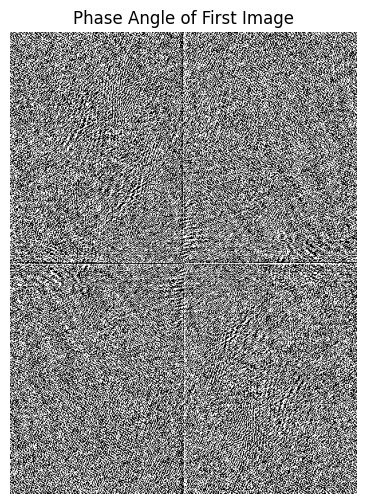

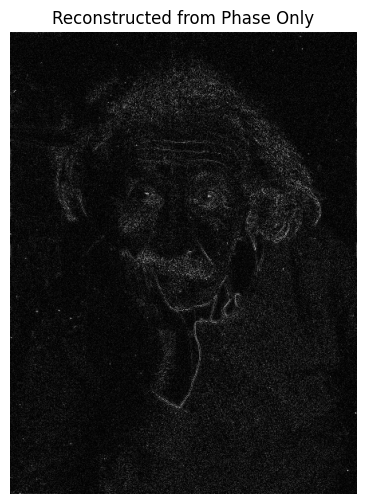

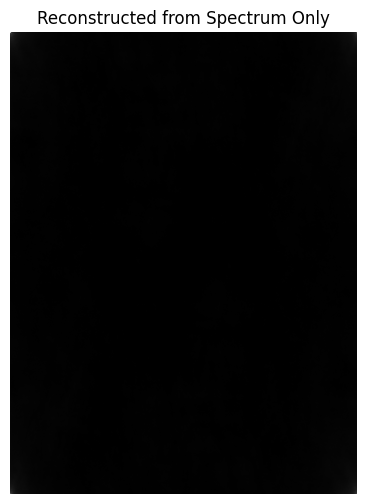

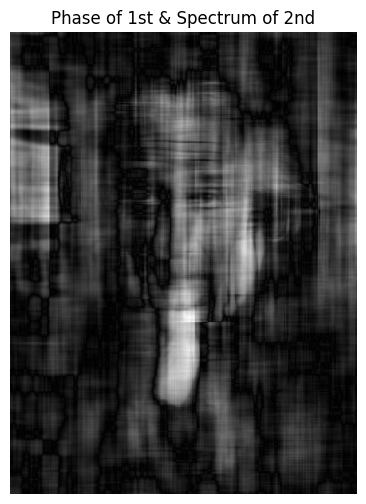

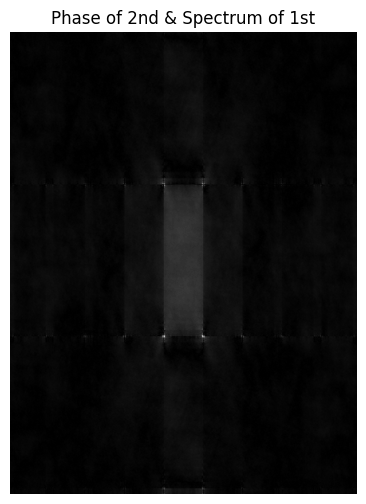

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

def load_image_grayscale(target_size=None):
    uploaded = files.upload()
    filename = next(iter(uploaded))
    image = Image.open(io.BytesIO(uploaded[filename])).convert('L')  # Convert to grayscale
    if target_size:
        image = image.resize(target_size, Image.ANTIALIAS)
    return np.array(image)

def display_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to calculate phase and magnitude
def compute_phase_spectrum(image):
    # Computes the 2D Fourier transform
    fft = np.fft.fft2(image)
    # Shifts the zero-frequency component to the center
    fft_shift = np.fft.fftshift(fft)
    # print(fft_shift)
    # Get magnitude and phase
    magnitude = np.abs(fft_shift)
    # in RadianS
    phase = np.angle(fft_shift)
    # print(magnitude)
    # print(phase)
    return magnitude, phase

# Function to reconstruct image from magnitude/phase
def reconstruct_image(magnitude, phase, use_phase=True, use_magnitude=True):
    if not use_magnitude:
      #ignoring the original magnitude and using a uniform magnitude for all frequency
        magnitude = np.ones(magnitude.shape)
    if not use_phase:
      # ignoring the original phase information and setting the phase of all frequency to zero
        phase = np.zeros(phase.shape)
    # Reconstructs the complex image from magnitude and phase using euler formula
    # then scales the sine and cosine waves by the magnitude
    complex_image = magnitude * np.exp(1j * phase)
    # shifting the zero-frequency component back to the original position, preparing the data for the inverse Fourier Transform
    fft_shift = np.fft.ifftshift(complex_image)
    #  the inverse 2D Fourier transform to get the spatial domain image
    reconstructed = np.fft.ifft2(fft_shift)
    return np.abs(reconstructed)

# Load the first image in grayscale
print("upload the first image:")
image1 = load_image_grayscale()
display_image(image1, "First Image")

# Load the second image in grayscale + resized to match the first image
print("upload the second image:")
image2 = load_image_grayscale(target_size=image1.shape[::-1])
display_image(image2, "Second Image")

# calculate phase and magnitude of the first image
magnitude1, phase1 = compute_phase_spectrum(image1)

# Show phase angle of the first image. Returns the angle of complex numbers
display_image(np.angle(phase1), "Phase Angle of First Image")

# Reconstruct the first image using only phase angle
reconstructed_phase_only = reconstruct_image(magnitude1, phase1, use_magnitude=False)
display_image(reconstructed_phase_only, "Reconstructed from Phase Only")

# Reconstruct the first image using only the spectrum
reconstructed_magnitude_only = reconstruct_image(magnitude1, phase1, use_phase=False)
display_image(reconstructed_magnitude_only, "Reconstructed from Spectrum Only")

# Compute phase and magnitude of the second image
magnitude2, phase2 = compute_phase_spectrum(image2)

# Reconstruct using phase of the first image and spectrum of the second image
reconstructed_phase1_magnitude2 = reconstruct_image(magnitude2, phase1)
display_image(reconstructed_phase1_magnitude2, "Phase of 1st & Spectrum of 2nd")

# Reconstruct using phase of the second image and spectrum of the first image
reconstructed_phase2_magnitude1 = reconstruct_image(magnitude1, phase2)
display_image(reconstructed_phase2_magnitude1, "Phase of 2nd & Spectrum of 1st")
